Analysis on Unemployment in India using python

In [6]:
import pandas as pd

# Load the dataset
url = 'Unemployment in India.csv'  # Replace with the actual path to your dataset
data = pd.read_csv('Unemployment in India.csv')
data.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


Exploratory Data Analysis (EDA)

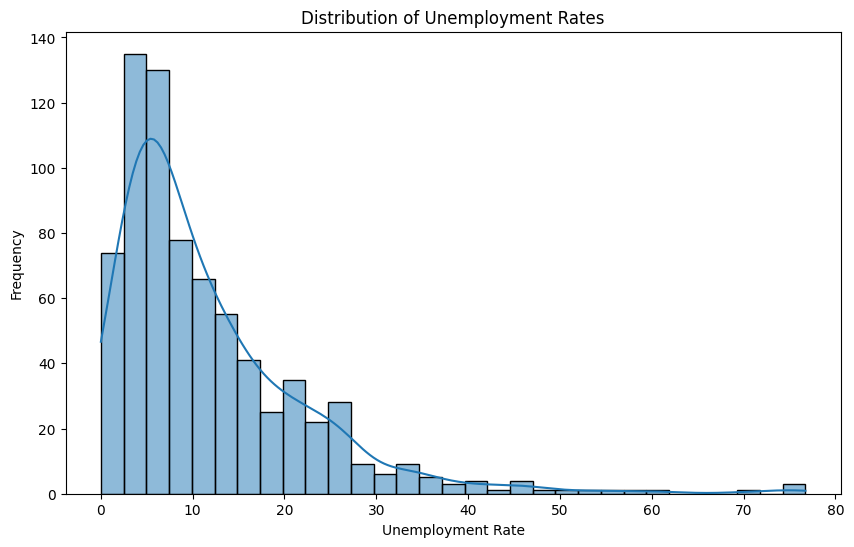

In [9]:
# Summary statistics
data.describe()

# Check for missing values
data.isnull().sum()

# Visualize the distribution of unemployment rates
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data[' Estimated Unemployment Rate (%)'], kde=True)
plt.title('Distribution of Unemployment Rates')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()


Data Visualisation

In [16]:
# Display column names to check for extra spaces or incorrect capitalization
print(data.columns)

# Strip any leading/trailing whitespace from column names and check again
data.columns = data.columns.str.strip()
print(data.columns)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')
Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


C:\Users\naman\AppData\Local\Temp\ipykernel_18612\3412149099.py:5: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


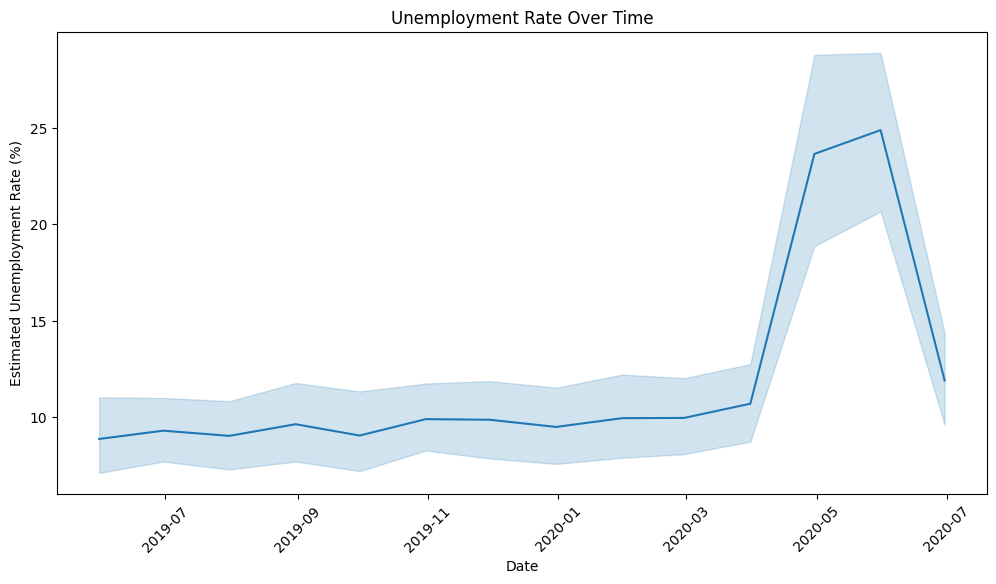

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Date' column is properly referenced and converted to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Line plot of unemployment rate over time for all regions
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=data)
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()


Analyzing the Impact of COVID-19

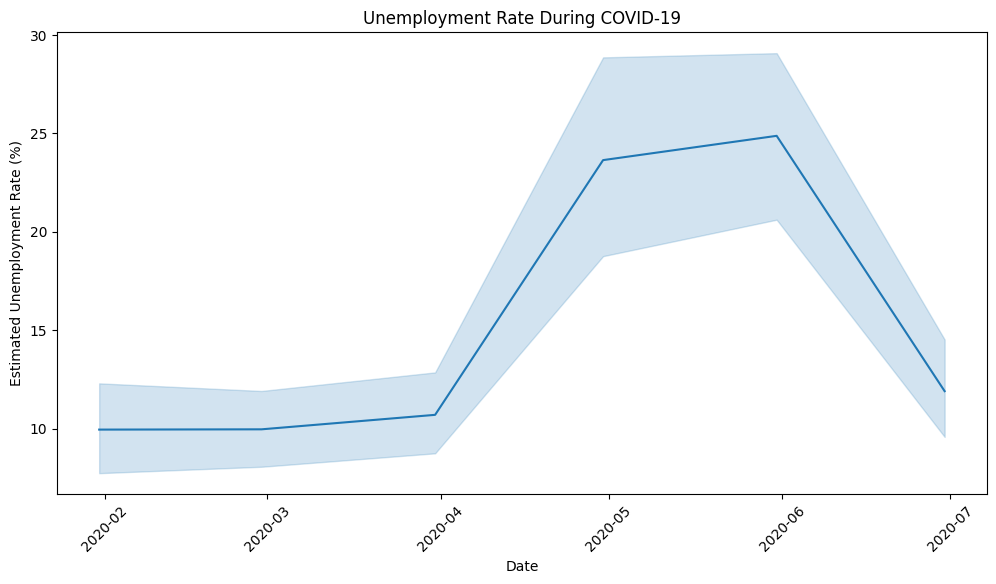

In [18]:
# Filter data for the period of COVID-19
covid_period = data[(data['Date'] >= '2020-01-01') & (data['Date'] <= '2021-12-31')]

# Line plot of unemployment rate during COVID-19 for all regions
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=covid_period)
plt.title('Unemployment Rate During COVID-19')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()


Forecasting Future Unemployment Rates

       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160000  
75%                                  45.505000  
max                                  72.570000  


C:\Users\naman\AppData\Local\Temp\ipykernel_18612\766123417.py:14: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


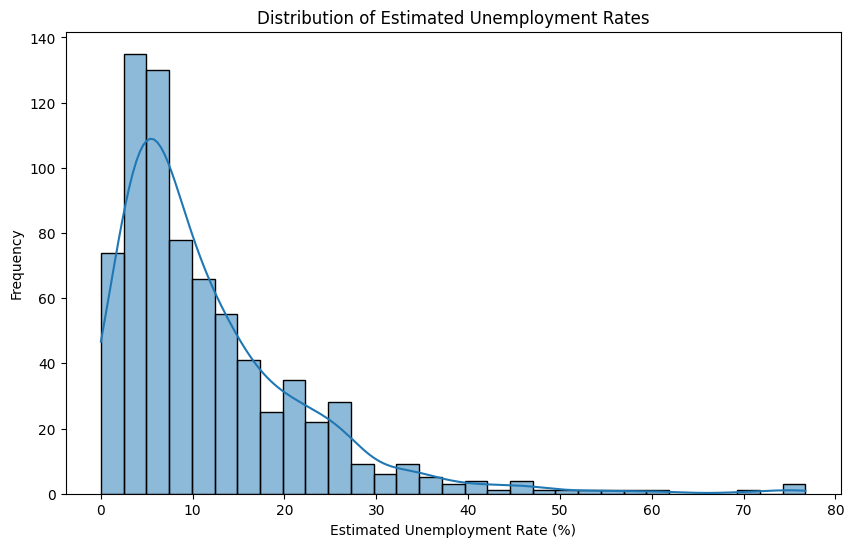

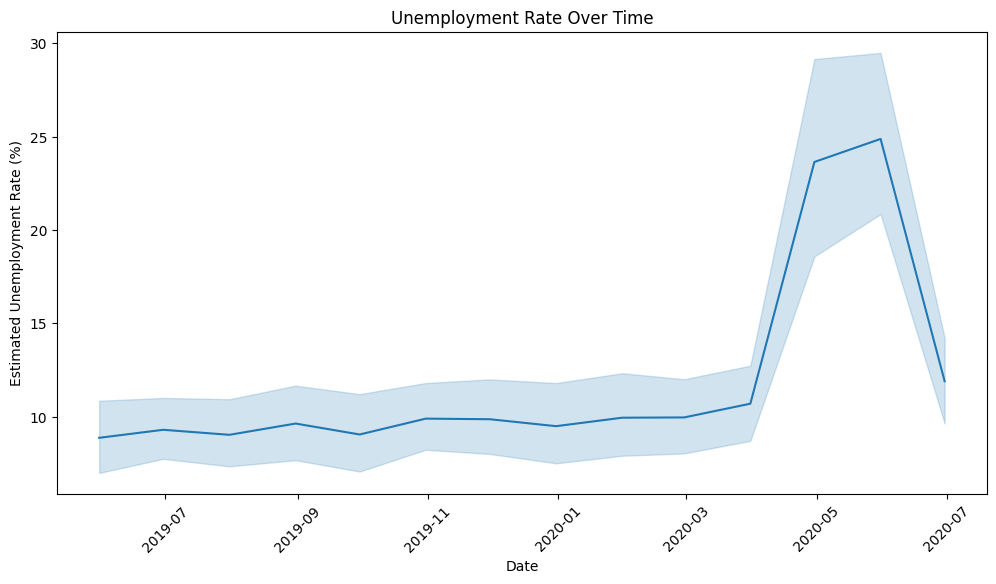

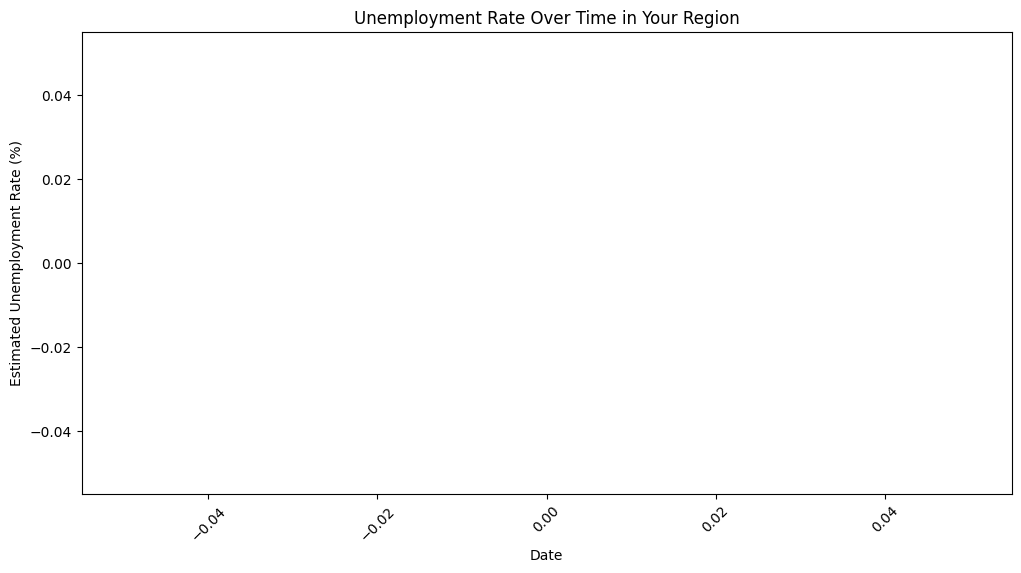

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\

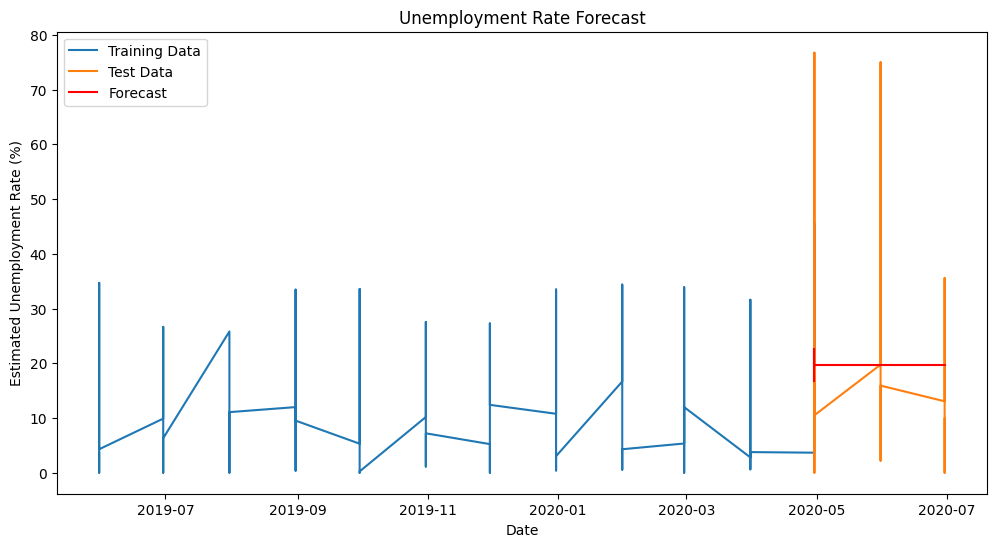

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
url = 'Unemployment in India.csv'  # Replace with the actual path to your dataset
data = pd.read_csv('Unemployment in India.csv')

# Clean column names
data.columns = data.columns.str.strip()

# Ensure 'Date' column is properly referenced and converted to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date
data = data.sort_values(by='Date')

# Set the date as the index
data.set_index('Date', inplace=True)

# Check for missing values and handle them
data = data.dropna()

# Summary statistics
print(data.describe())

# Visualize the distribution of unemployment rates
plt.figure(figsize=(10, 6))
sns.histplot(data['Estimated Unemployment Rate (%)'], kde=True)
plt.title('Distribution of Estimated Unemployment Rates')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

# Line plot of unemployment rate over time for all regions
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=data)
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Line plot of unemployment rate over time for a specific region
region = 'Your Region'  # Replace with the desired region
regional_data = data[data['Region'] == region]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=regional_data)
plt.title(f'Unemployment Rate Over Time in {region}')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Prepare the data for time series modeling
unemployment_rate = data['Estimated Unemployment Rate (%)']

# Split the data into training and testing sets
train = unemployment_rate[:int(0.8 * len(unemployment_rate))]
test = unemployment_rate[int(0.8 * len(unemployment_rate)):]

# Build and fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Unemployment Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend()
plt.show()
